# Scrapping tabular data from a website using bs4

#### importing Required libraries

In [378]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline

#### making GET request to website

In [379]:
link = "https://en.wikipedia.org/wiki/The_World%27s_Billionaires"
req = requests.get(link)
req

<Response [200]>

#### Getting HTML content of website using BeautifulSoup 

In [380]:
soup = BeautifulSoup(req.content, "lxml")

#### finding specific elements with 'Tags' and 'Class' 

In [381]:
body = soup.find_all("body")

In [382]:
data = soup.find("div", { "class" : "mw-parser-output"})

In [383]:
headings = data.find_all('h3')

In [384]:
lagend = data.find('table', class_="wikitable")

 

In [385]:
l1 = lagend.find('tbody')
l2 = l1.find_all('img')

#### getting image url from 'Legend' table and mapping them to corresponding value

In [386]:
dic = {}
li = ["Steady", "Increased", "Decreased"]

for t,l in zip(l2, li):
    t1 = t.attrs['src']
    dic[t1] = l
    # print(t1)
print(dic)  


{'//upload.wikimedia.org/wikipedia/commons/thumb/9/96/Steady2.svg/11px-Steady2.svg.png': 'Steady', '//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png': 'Increased', '//upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Decrease2.svg/11px-Decrease2.svg.png': 'Decreased'}


In [387]:
# for head in headings:
#     h = head.contents[0].attrs
#     h1 = h['class']
#     print(h1)

#### getting Year of table (data)

In [388]:
year = []
for ye in headings:
    # print(year.text)
    year.append(ye.text)
year = year[1:-2]
# year[21]

#### Getting data of tables and storing them into python list

In [389]:
tables = data.find_all('table', class_='sortable')   # tables with class: 'sortable'

l = []
i=0
for tbody in tables:
    tb = tbody.find('tbody')
    tr = tb.find_all('tr')

    for tr1 in tr:
        td = tr1.find_all('td')

        l1 = []
        l1.append(year[i])
        j=1
        for td1 in td:
            img1 = td1.find('img') # getting img,  indicating rank compared to previous year
            if img1:
                if img1['alt']:
                    img2 = img1['src']
                    img2 = dic[img2]
                else:
                    img2 = None
                
            else:
                img2 = None
            # print(td1.text)
            val = td1.text.replace('\n', '').replace('\xa0',' ')
            l1.append(val)
            if(img2):
                l1.append(img2)

            if(year[i]=='2000' and ( j==1 or j==3)   ): # for correction in year 2000, there are no rank images in year 2000 
                l1.append("-")
            
            j = j+1

        if len(l1)>1:
            l.append(l1)
    i = i+1
    if i==22:
        i=21   
        # print("\n\n")
    # print("#####################")

# last table also have same class:'sortable' with no valuable data

l = l[:-23]  # removing data of last table

# l 

#### Storing data into Pandas DataFrame

In [390]:
clm = ['Year','Position', 'Position relative to previous year', 'Name', 'Net Worth', 'Net Worth value compared to previous year', 'Age', 'Nationality', 'Source(s) of welth']

df = pd.DataFrame(l, columns=clm)

#### exporting data into csv file 'billionaires_data.csv'

In [391]:
# df.to_csv('billionaires_data.csv')

#### storing some valuable data into new DataFrame and getting int value from net worth and plotting pie chart corresponding to data of year 2021 

In [392]:
df2 = df[['Name','Net Worth']][0:10]

In [393]:
val = []
for x in  df2['Net Worth']:
    x = x.split()[0][1:]
    x = float(x)
    val.append(x)
df2['Net worth (int)'] = pd.DataFrame(val)
df2


,Name,Net Worth,Net worth (int)
0,Jeff Bezos,$177 billion,177.0
1,Elon Musk,$151 billion,151.0
2,Bernard Arnault & family,$150 billion,150.0
3,Bill Gates,$124 billion,124.0
4,Mark Zuckerberg,$97 billion,97.0
5,Warren Buffett,$96 billion,96.0
6,Larry Ellison,$93 billion,93.0
7,Larry Page,$91.5 billion,91.5
8,Sergey Brin,$89 billion,89.0
9,Mukesh Ambani,$84.5 billion,84.5


In [394]:
df3 = df2.groupby("Name")['Net worth (int)'].sum()
df3

Name
Bernard Arnault & family    150.0
Bill Gates                  124.0
Elon Musk                   151.0
Jeff Bezos                  177.0
Larry Ellison                93.0
Larry Page                   91.5
Mark Zuckerberg              97.0
Mukesh Ambani                84.5
Sergey Brin                  89.0
Warren Buffett               96.0
Name: Net worth (int), dtype: float64

<AxesSubplot:ylabel='Net worth (int)'>

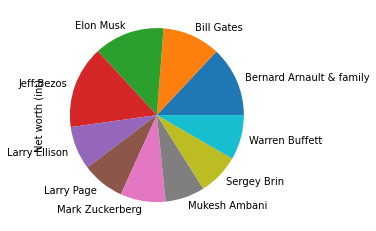

In [395]:
df3.plot.pie()